# EXPERIMENT NO 6

#### MULTIPLE LINEAR REGRESSION USING RANDOM DATA

In [9]:
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


In [10]:
def generate_dataset(n):
    x=[]
    y=[]
    for i in range(1,n+1):
        x1=i
        x2=i/2+np.random.rand()*n
        x.append([1,x1,x2])
        y.append(x1*x1+x2*x2+x1)
    print('Generated X values:',np.array(x))
    print('Generated Y values:',np.array(y))
    return np.array(x),np.array(y)

def mse(coef,x,y):
    return np.mean((np.dot(x,coef)-y)**2)/2


In [11]:
def gradients(coef,x,y):
    return np.mean(x.transpose()*(np.dot(x,coef)-y),axis=1)

def multilinear_regression(coef,x,y,lr,b1=.9,b2=.999,eplsilon=1e-8):
    prev_error=0
    m_coef=np.zeros(coef.shape)
    v_coef=np.zeros(coef.shape)
    moment_m_coef=np.zeros(coef.shape)
    moment_v_coef=np.zeros(coef.shape)
    t=0
    
    while True:
        error=mse(coef,x,y)
        if abs(error-prev_error)<=eplsilon:
            break
        prev_error=error
        grad=gradients(coef,x,y)
        t+=1
        m_coef=b1*m_coef+(1-b1)*grad
        v_coef=b2*v_coef+(1-b2)*grad**2
        moment_m_coef=m_coef/(1-b1**t)
        moment_v_coef=v_coef/(1-b2**t)
        
        delta=((lr/moment_v_coef**.5+1e-8)*(b1*moment_m_coef+(1-b1)*grad/(1-b1**t)))
        coef=np.subtract(coef,delta)
    
    return coef


Generated X values: [[ 1.          1.         33.1684067 ]
 [ 1.          2.          3.35455818]
 [ 1.          3.          2.0809538 ]
 [ 1.          4.         39.82659959]
 [ 1.          5.          8.57782954]
 [ 1.          6.         23.2246643 ]
 [ 1.          7.         49.82140279]
 [ 1.          8.         14.76268735]
 [ 1.          9.         29.03226664]
 [ 1.         10.         21.77511665]
 [ 1.         11.          8.66247005]
 [ 1.         12.         40.29271901]
 [ 1.         13.         38.68289963]
 [ 1.         14.         34.17172556]
 [ 1.         15.         26.596915  ]
 [ 1.         16.         21.06673936]
 [ 1.         17.         11.81746884]
 [ 1.         18.         55.7942906 ]
 [ 1.         19.         12.91280334]
 [ 1.         20.         18.37416414]
 [ 1.         21.         19.50448767]
 [ 1.         22.         20.05461873]
 [ 1.         23.         31.0575045 ]
 [ 1.         24.         20.304269  ]
 [ 1.         25.         36.96351977]
 [ 1.

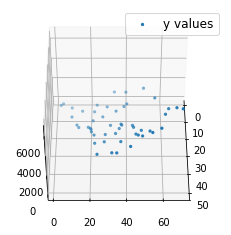

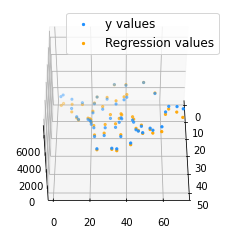

In [12]:
x,y=generate_dataset(50)
mpl.rcParams['legend.fontsize']=12

fig=plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x[:,1],x[:,2],y,label='y values',s=5)
ax.legend(loc='best')
ax.view_init(45,0)

plt.show()

coef=np.array([0,0,0])
c=multilinear_regression(coef,x,y,1e-1)
fig=plt.figure()

ax = fig.add_subplot(projection='3d')
ax.scatter(x[:,1],x[:,2],y,label='y values',s=5,color='dodgerblue')
ax.scatter(x[:,1],x[:,2],c[0]+c[1]*x[:,1]+c[2]*x[:,2],label='Regression values',s=5,color='orange')
ax.view_init(45,0)
ax.legend(loc='best')

plt.show()


# 